In [1]:
import numpy as np
from numpy.random import *
import random
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.svm import SVC




In [2]:
class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, threshold):
        self.iter = num_iter
        self.lr = lr
        self.threshold = threshold
        self.index_1 = []

    def SVC_hypothesis(self, X, y):
        y = y.reshape(1, -1)
        for i in range(y.shape[0]):
            temp = 0
            for j in range(len(y)):
                temp += self.lambda_[j] * y[i] * y[j] * np.dot(X[i].T, X[j])
                self.lambda_ += self.lr * (1 - temp)[:, np.newaxis]  # Add np.newaxis to ensure shapes match
                self.lambda_[self.lambda_ <= 0] = 0
        return self.lambda_


    def fit(self, X, y, X_val=None, y_val=None):
        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03

        for i in range(self.iter):
            self.SVC_hypothesis(X, y)

        self.index_1 = []
        for j, i in enumerate(self.lambda_):
            if i > self.threshold:
                self.index_1.append(j)

        self.lambda_sv = self.lambda_[self.index_1]
        self.X_sv = X[self.index_1]
        self.y_sv = y[self.index_1]

    def predict(self, X):
        self.y_pred = np.zeros(X.shape[0], dtype=int)  # Initialize y_pred as an array of integers
        for i in range(self.lambda_sv.shape[0]):
            self.y_pred += (self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)).astype(int)  # Cast the result to int
            self.y_pred = np.where(self.y_pred > 0, 1, -1)
        return self.y_pred



In [3]:
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y[y==2] = -1

In [4]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
X_test1 =Scaler.transform(X_test)

SV =ScratchLogisticRegression(num_iter=10000, lr=0.01, threshold =0.038)
SV.fit(X_train1, y_train)
y_pred =SV.predict(X_test1)


In [6]:
print( "{}".format(precision_score(y_test, y_pred)))
print( "{}".format(recall_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))


1.0
0.7333333333333333
[[15  0]
 [ 4 11]]


In [7]:
def decision_region(X,y, model, step=0.01, title ='Decison Region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    Scatter_color = ['red', 'blue']
    contourf_color =['pink', 'skyblue']
    n_class=2
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 1, step)
    )
    mesh = np.c_[mesh_f0.ravel(), mesh_f1.ravel()]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

 # Plot decision boundary
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, alpha=0.3, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1,  color='y', line_width=3, alpha =0.5)

    # Plot data points
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=Scatter_color[i], label=target_names[i], edgecolors='k', marker='o')
    if model == SV:
        plt.scatter (SV.X_sv[:,0], SV.X_sv[:,1], s=80, color='yellow', marker ='o')
    else:
        plt.scatter (X_train[svc.support_, 0], X_train[svc.support_, 0], s=80, color='yellow', marker ='o')
        
    patches = [mpatches.Patch(color=Scatter_color[i], label=target_names[i]) for i in range(n_class)]

    plt.legend(handles=patches)
    plt.legend()


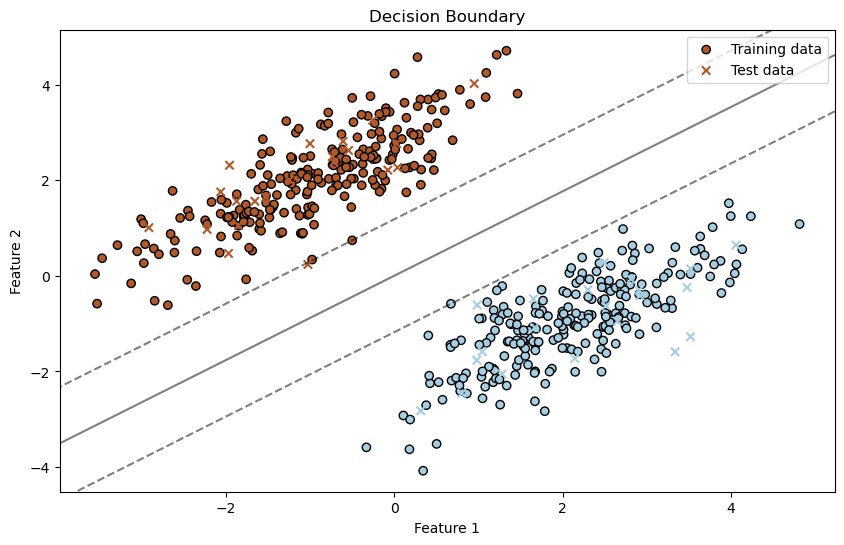

In [8]:
# Generate synthetic data
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

x = np.concatenate((f0, f1))
y = np.concatenate((np.ones(int(n_samples/2)), np.ones(int(n_samples/2)) * (-1))).astype(int)

random_index = np.random.permutation(np.arange(n_samples))

X = x[random_index]
y = y[random_index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=42, stratify=y)

# Train a Support Vector Classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Test data')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()
